## Final Project Submission

Please fill out:
* Student name: Abdulrahman Aber, Benjamin Bai, Charles Pan, Kevin Rivera
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: David Elliott
* Blog post URL:


# Imports

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sqlite3 as sq
conn = sq.connect('./data/im.db')
cur = conn.cursor()


# BOM Movie Gross DF
Columns Removed: None

In [215]:
bom_movie_gross_df = pd.read_csv('./data/bom.movie_gross.csv')

bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [228]:
sorted_bom = bom_movie_gross_df.sort_values(by=['domestic_gross'],ascending=False).head(20)
sorted_bom['title']

1872       Star Wars: The Force Awakens
3080                      Black Panther
3079             Avengers: Infinity War
1873                     Jurassic World
727               Marvel's The Avengers
2758           Star Wars: The Last Jedi
3082                      Incredibles 2
2323       Rogue One: A Star Wars Story
2759        Beauty and the Beast (2017)
2324                       Finding Dory
1875            Avengers: Age of Ultron
729               The Dark Knight Rises
1131    The Hunger Games: Catching Fire
3081     Jurassic World: Fallen Kingdom
0                           Toy Story 3
2767                       Wonder Woman
1128                         Iron Man 3
2322         Captain America: Civil War
735                    The Hunger Games
2762     Jumanji: Welcome to the Jungle
Name: title, dtype: object

In [235]:
sorted_bom

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000,"1,131.6",2015
3080,Black Panther,BV,700100000,646900000,2018
3079,Avengers: Infinity War,BV,678800000,"1,369.5",2018
1873,Jurassic World,Uni.,652300000,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000,712400000,2017
3082,Incredibles 2,BV,608600000,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000,759500000,2017
2324,Finding Dory,BV,486300000,542300000,2016


In [229]:
bom_movie_gross_df.dropna(inplace=True)

In [230]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int32 
 3   foreign_gross   2007 non-null   object
 4   year            2007 non-null   int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 86.2+ KB


In [231]:
bom_movie_gross_df["domestic_gross"]=bom_movie_gross_df["domestic_gross"].astype(int)

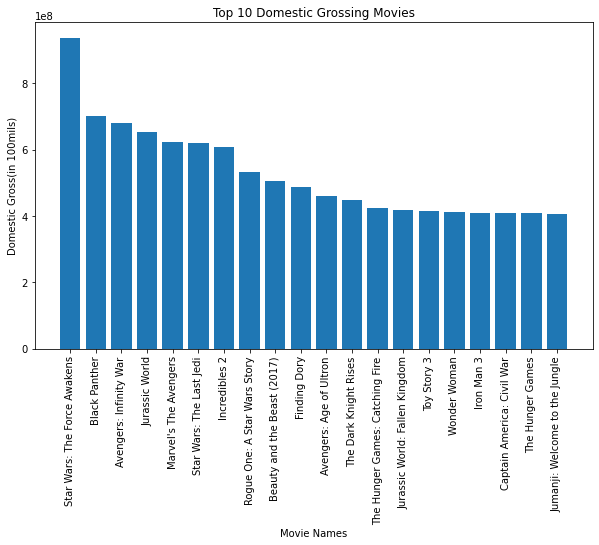

In [233]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sorted_bom['title'],sorted_bom['domestic_gross'])
ax.set_xlabel('Movie Names')
ax.set_ylabel('Domestic Gross(in 100mils)')
ax.set_title('Top 10 Domestic Grossing Movies')
plt.xticks(rotation=90);

# IMDB DB DFS

In [81]:
imdb_schema = pd.read_sql('''SELECT * FROM sqlite_master''',conn)
imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [10]:
movie_basics_df = pd.read_sql('''select * from movie_ratings''', conn)
movie_basics_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
directors_df = pd.read_sql("""select * from directors""",conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [12]:
known_for_df = pd.read_sql("""select * from known_for""",conn)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [13]:
movie_akas_df = pd.read_sql("""select * from movie_akas""",conn)
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [14]:
movie_ratings_df = pd.read_sql("""select * from movie_ratings""",conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
persons_df = pd.read_sql("""select * from persons""",conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [16]:
principals_df = pd.read_sql("""select * from principals""",conn)
principals_df.head()


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [17]:
writers_df = pd.read_sql("""select * from writers""",conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


# RT Movie Info DF
Columns Removed: Synopsis, Currency, Box_Office (getting box office data elsewhere)
Note - Break genres into multiple columns or somehow else clean it or just do contains

In [39]:
rt_movie_info_df = pd.read_csv('./data/rt.movie_info.tsv', sep='\t')
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# RT Reviews DF
Columns Removed: Review, Critic, Top_Critic
Note - can we link this to movie names? scrape movie titles from ID?

In [36]:
rt_reviews_df = pd.read_csv('./data/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape')
rt_reviews_df.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


# TMDB Movies DF
- Remove Columns: Unnamed: 0, TBD

In [32]:
tmdb_movies_df = pd.read_csv('./data/tmdb.movies.csv')
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# TN Movie Budgets DF
Remove Columns: None

In [95]:
tn_movie_budgets_df = pd.read_csv('./data/tn.movie_budgets.csv')
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# VISUALIZATIONS